## Basic regression: Predict fuel efficiency

In [1]:
# Just to see the a pretty table of content, you can install jupyter notebook extensions
# Uncomment the below line
#!pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install 

In [2]:
# Basic regression to predict fuel efficiency
# Code is based on this tutorial: https://www.tensorflow.org/tutorials/keras/regression
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # pip install pandas

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import seaborn as sns

In [4]:
# Use seaborn for pairplot.
# If you  want to investigate the relationship between different variables, uncomment the following line to install seaborn
# !pip install -q seaborn

In [5]:
# Check tf & keras versions, this will be helpfull if you get errors and you need to check the doc or other resources

tf.__version__, keras.__version__

('2.7.0', '2.7.0')

## Data loading

In [6]:
# https://archive.ics.uci.edu/ml/datasets/Auto+MPG
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

# We have 8 columns
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']


# Read more about the options
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
dataset = pd.read_csv(url, names=column_names, na_values='?',comment='\t', sep=' ', skipinitialspace=True)

In [7]:
# check the data frame info
# Note that Horsepower has 6 missign values
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB
None


In [8]:
# Print the last 10 rows
dataset.tail(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
388,26.0,4,156.0,92.0,2585.0,14.5,82,1
389,22.0,6,232.0,112.0,2835.0,14.7,82,1
390,32.0,4,144.0,96.0,2665.0,13.9,82,3
391,36.0,4,135.0,84.0,2370.0,13.0,82,1
392,27.0,4,151.0,90.0,2950.0,17.3,82,1
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [9]:
# Print the first 10 rows
dataset.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


In [10]:
# To test your parameters, it is better to write the data to a new file and see the difference with original one!!

dataset.to_csv('new_dataset.csv', encoding='utf-8')

## Data preprocessing

In [11]:
# Summ the unknown values 
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [12]:
# Check the type of the dataset
type(dataset)

pandas.core.frame.DataFrame

In [13]:
# print the rows with NaN values

dataset[dataset.isnull().any(axis=1)]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


In [14]:
# I am sad, we have 6 NaN values. Ahhhhhhha, we need to remove them to make the project easier

In [15]:
# Remove rows with NaN values
# Remove missing values.

dataset = dataset.dropna()

In [16]:
# print the rows with NaN values

dataset[dataset.isnull().any(axis=1)]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin


In [17]:
# Great, now the data is cleaned from Naaan values ....
# Let's continue and have more fun ....

In [18]:
# Get the unique values (categories) from the Origin column

dataset['Origin'].unique()

array([1, 3, 2])

In [19]:
# Convert Categorical 'Origin' data into one-hot encode format
# Remove the Origin column from the dataset and save it on origin

origin = dataset.pop('Origin')
origin

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64

In [20]:
# Check the dataset now

dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70


In [21]:
# Awesome, the origin is cleaned

In [22]:
# Add 3 columns to the dataset
dataset['USA'] = (origin == 1) * 1 # To convert True to 1 and False to 0
dataset['Europe'] = (origin == 2) * 1  
dataset['Japan'] = (origin == 3) *1

In [23]:
# Print the top 5 rows to see the new dataset
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [24]:
# Check the rows that has Japan for example, just to make sure, hahahaaa.
dataset[dataset['Japan'] == 1]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
14,24.0,4,113.0,95.0,2372.0,15.0,70,0,0,1
18,27.0,4,97.0,88.0,2130.0,14.5,70,0,0,1
29,27.0,4,97.0,88.0,2130.0,14.5,71,0,0,1
31,25.0,4,113.0,95.0,2228.0,14.0,71,0,0,1
53,31.0,4,71.0,65.0,1773.0,19.0,71,0,0,1
...,...,...,...,...,...,...,...,...,...,...
382,34.0,4,108.0,70.0,2245.0,16.9,82,0,0,1
383,38.0,4,91.0,67.0,1965.0,15.0,82,0,0,1
384,32.0,4,91.0,67.0,1965.0,15.7,82,0,0,1
385,38.0,4,91.0,67.0,1995.0,16.2,82,0,0,1


## Data Preperation and Splitting

In [25]:
# Split the data into train and test
# .sample >> Return a random sample of items from an axis of object.
# You can use random_state for reproducibility.
# frac: 0.8 >> 80% of the data

train_dataset = dataset.sample(frac=0.8, random_state=0)

In [26]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 146 to 182
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           314 non-null    float64
 1   Cylinders     314 non-null    int64  
 2   Displacement  314 non-null    float64
 3   Horsepower    314 non-null    float64
 4   Weight        314 non-null    float64
 5   Acceleration  314 non-null    float64
 6   Model Year    314 non-null    int64  
 7   USA           314 non-null    int64  
 8   Europe        314 non-null    int64  
 9   Japan         314 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 27.0 KB


## Inspect the data

In [27]:
import seaborn as sns

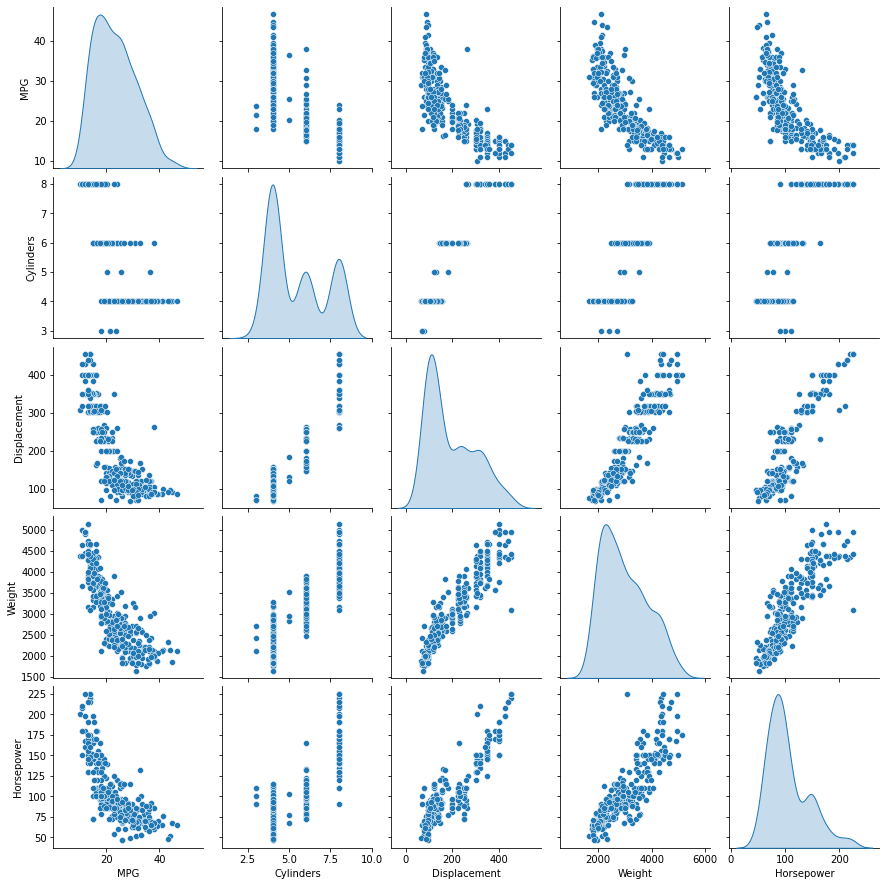

In [28]:
# Review the joint distribution of a few pairs of columns from the training set.


sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight', 'Horsepower']], diag_kind='kde')


In [29]:
#The top row suggests that the fuel efficiency (MPG) is a function of all the other parameters. 
#The other rows indicate they are functions of each other.

# Make sense for us, what do you think?

In [30]:
# The length of the full dataset
len(dataset)

392

In [31]:
# The length of the train dataset
len(train_dataset)

314

In [32]:
# Check the fraction of the dataset
print("The size of this sample is ", train_dataset.size/dataset.size)

The size of this sample is  0.8010204081632653


In [33]:
# Check the indices
train_dataset.index

Int64Index([146, 282,  69, 378, 331, 257, 310, 328, 125, 108,
            ...
            171,  70, 307,  49, 209, 281, 229, 150, 145, 182],
           dtype='int64', length=314)

In [34]:
# Check some usefull information

In [35]:
type(dataset)

pandas.core.frame.DataFrame

In [36]:
# Create test dataset
test_dataset = dataset.drop(train_dataset.index)

In [37]:
# Print the length of the test dataset
len(test_dataset)

78

In [38]:
# Double check the you split the data correctly
len(train_dataset) + len(test_dataset) == len(dataset)

True

In [39]:
print(f"Full: {dataset.shape}, train: {train_dataset.shape}, test: {test_dataset.shape}")

Full: (392, 10), train: (314, 10), test: (78, 10)


In [40]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [41]:
# Split features from labels 

train_features = train_dataset.copy() # Make a copy of this object's indices and data.
test_features  = test_dataset.copy()

In [42]:
# So, MPG will be the variable to predict

train_labels = train_features.pop('MPG')
test_labels  = test_features.pop('MPG') 

In [43]:
# Help function  to plot the feature with MPG

def plot_feature(feature, x=None, y = None):
    plt.figure(figsize=(10,10))
    plt.scatter(train_features[feature], train_labels, label ='Data')
    
    if x is not None and y is not None:
        plt.plot(x,y, color ='k', label= 'Predictions')
    
    plt.xlabel(feature)
    plt.ylabel('MPG')
    plt.legend()

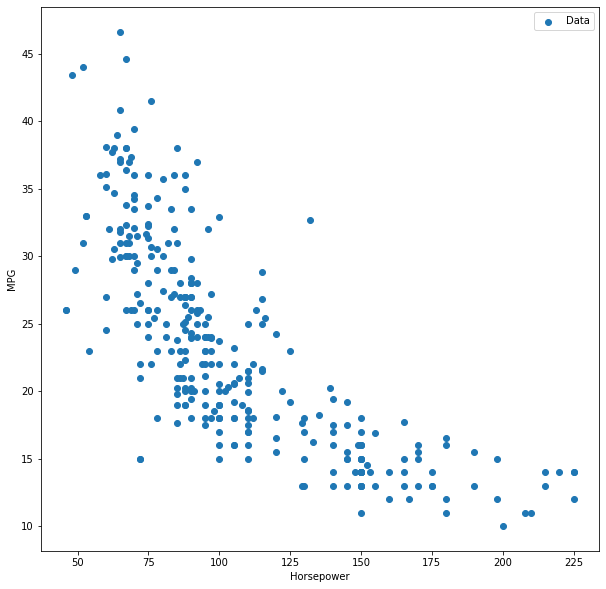

In [44]:
plot_feature('Horsepower')

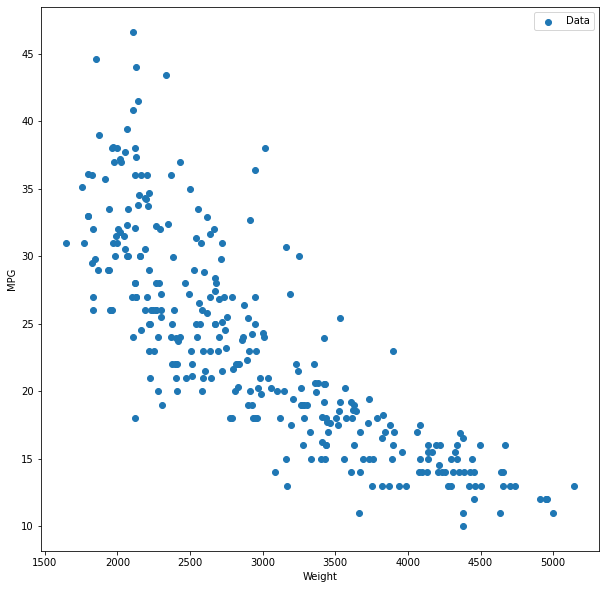

In [45]:
plot_feature('Weight')

In [46]:
# Check the mean and std of the data
print(train_dataset.describe().transpose()[['mean', 'std']])

                     mean         std
MPG             23.310510    7.728652
Cylinders        5.477707    1.699788
Displacement   195.318471  104.331589
Horsepower     104.869427   38.096214
Weight        2990.251592  843.898596
Acceleration    15.559236    2.789230
Model Year      75.898089    3.675642
USA              0.624204    0.485101
Europe           0.178344    0.383413
Japan            0.197452    0.398712


In [47]:
# Normlization
# A preprocessing layer which normalizes continuous features.

normalizer = preprocessing.Normalization()

In [48]:
# adapt to the data
# Fits the state of the preprocessing layer to the data being passed.
# print(type(train_features))

normalizer.adapt(np.array(train_features))

In [49]:
train_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [50]:
normalizer.mean.numpy()

array([[   5.478,  195.318,  104.869, 2990.252,   15.559,   75.898,
           0.624,    0.178,    0.197]], dtype=float32)

In [51]:
train_features.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,4,90.0,75.0,2125.0,14.5,74,1,0,0
282,4,140.0,88.0,2890.0,17.3,79,1,0,0
69,8,350.0,160.0,4456.0,13.5,72,1,0,0
378,4,105.0,63.0,2125.0,14.7,82,1,0,0
331,4,97.0,67.0,2145.0,18.0,80,0,0,1


In [52]:
# When the layer is called it returns the input data, with each feature independently normalized:
# (input-mean)/stddev

first = np.array(train_features[:1])
print('First example:', first)
print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     1.     0.     0. ]]
Normalized: [[-0.871 -1.011 -0.785 -1.027 -0.38  -0.517  0.776 -0.466 -0.496]]


# Models

## Linear regression with one variable

In [53]:
# Regression
 # 1. Normalize the input horsepower
 # 2. Apply a linear transformation (y = m*x+b) to produce 1 output using layers.Dense

feature = 'Horsepower'
single_feature = np.array(train_features[feature])
print(single_feature.shape, train_features.shape)

# Normalization
# If `axis` is set to `None`, the layer will normalize all elements in the input by a scalar mean and variance.

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
# adapt to the data
horsepower_normalizer.adapt(single_feature)

(314,) (314, 9)


In [54]:
# Sequential model
single_feature_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

In [55]:
single_feature_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [56]:
#This model will predict 'MPG' from 'Horsepower'.
#Run the untrained model on the first 10 'Horsepower' values. The output won't be good, but notice that it has the expected shape of (10, 1):
single_feature_model.predict(single_feature[:10])

array([[ 0.075],
       [ 0.043],
       [-0.139],
       [ 0.106],
       [ 0.095],
       [ 0.037],
       [ 0.113],
       [ 0.095],
       [ 0.025],
       [ 0.043]], dtype=float32)

In [57]:
print(single_feature_model.predict(single_feature[:10]).shape)

(10, 1)


In [58]:
# loss and optimizer

single_feature_model.compile(optimizer =tf.optimizers.Adam(learning_rate=0.1), loss= 'mean_absolute_error')

In [59]:
history = single_feature_model.fit(
    train_features[feature], 
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 0s 23ms/step - loss: 22.8860 - val_loss: 22.9356
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 22.0627 - val_loss: 22.1353
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 21.2620 - val_loss: 21.3354
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 20.4643 - val_loss: 20.5351
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 19.6614 - val_loss: 19.7352
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 18.8621 - val_loss: 18.9353
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 18.0615 - val_loss: 18.1353
Epoch 8/100
8/8 [==============================] - 0s 8ms/step - loss: 17.2618 - val_loss: 17.3353
Epoch 9/100
8/8 [==============================] - 0s 10ms/step - loss: 16.4614 - val_loss: 16.5353
Epoch 10/100
8/8 [==============================] - 0s 10ms/step - loss: 15.6620 - val_loss: 15.7354
Epoch 

8/8 [==============================] - 0s 8ms/step - loss: 3.8028 - val_loss: 4.1737
Epoch 85/100
8/8 [==============================] - 0s 9ms/step - loss: 3.8041 - val_loss: 4.1709
Epoch 86/100
8/8 [==============================] - 0s 8ms/step - loss: 3.8033 - val_loss: 4.1893
Epoch 87/100
8/8 [==============================] - 0s 8ms/step - loss: 3.8030 - val_loss: 4.1954
Epoch 88/100
8/8 [==============================] - 0s 10ms/step - loss: 3.8032 - val_loss: 4.1959
Epoch 89/100
8/8 [==============================] - 0s 8ms/step - loss: 3.8032 - val_loss: 4.1940
Epoch 90/100
8/8 [==============================] - 0s 7ms/step - loss: 3.8044 - val_loss: 4.1764
Epoch 91/100
8/8 [==============================] - 0s 7ms/step - loss: 3.8054 - val_loss: 4.1982
Epoch 92/100
8/8 [==============================] - 0s 13ms/step - loss: 3.8049 - val_loss: 4.1820
Epoch 93/100
8/8 [==============================] - 0s 16ms/step - loss: 3.8024 - val_loss: 4.1917
Epoch 94/100
8/8 [============

In [60]:
history

In [61]:
# Smart
# The loss is calculated at the end of epoch
len(history.history['loss'])

100

In [62]:
# dict has two list, loss and val_loss
history.history

{'loss': [22.88603401184082,
  22.062719345092773,
  21.261991500854492,
  20.464309692382812,
  19.661441802978516,
  18.862138748168945,
  18.061498641967773,
  17.26178550720215,
  16.461355209350586,
  15.661982536315918,
  14.862725257873535,
  14.06348705291748,
  13.26822566986084,
  12.480182647705078,
  11.697200775146484,
  10.920740127563477,
  10.13773250579834,
  9.371216773986816,
  8.631382942199707,
  7.931751251220703,
  7.237228870391846,
  6.609683513641357,
  6.016685962677002,
  5.510482311248779,
  5.077060699462891,
  4.754333972930908,
  4.519957065582275,
  4.299534797668457,
  4.1479291915893555,
  4.041847229003906,
  3.962779998779297,
  3.9023327827453613,
  3.86686110496521,
  3.847177505493164,
  3.8283443450927734,
  3.824528455734253,
  3.815854549407959,
  3.8099043369293213,
  3.8092763423919678,
  3.8038651943206787,
  3.8055484294891357,
  3.8056507110595703,
  3.805464744567871,
  3.8035025596618652,
  3.8072311878204346,
  3.806509494781494,
  3.8

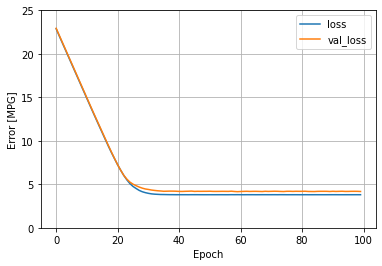

In [63]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0,25])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid()
    
plot_loss(history)

In [64]:
# Create a dict to store the evaluation for each model
test_results = {}

In [65]:
# Evaluate the model on the test data
# Returns the loss value & metrics values for the model in test mode.

test_results['Single_feature_Regression'] = single_feature_model.evaluate(test_features[feature], test_labels, verbose=1)

3/3 [==============================] - 0s 5ms/step - loss: 3.6445


In [66]:
test_results['Single_feature_Regression'] 

3.6445250511169434

In [67]:
np.min(test_features[feature]), np.max(test_features[feature])

(48.0, 230.0)

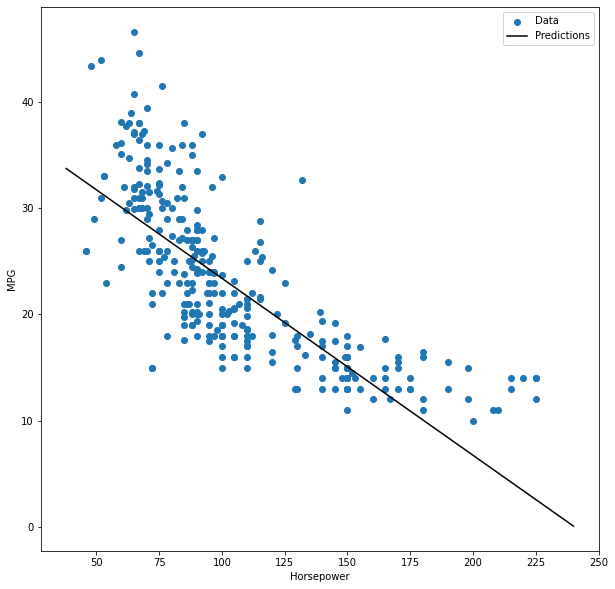

In [68]:
# Predict and plot 

range_min = np.min(test_features[feature]) - 10
range_max = np.max(test_features[feature]) + 10
x = tf.linspace(range_min, range_max, 200)
y = single_feature_model.predict(x)

plot_feature(feature, x, y)

In [69]:
# We see in the above graph that it doesn't fit well, so let's go for multiple inputs

## Linear regression with multiple inputs

In [70]:
# Model creation
# We have 9 features
M_input_normalizer = layers.Normalization(input_shape=[9,], axis=None)


linear_model = tf.keras.Sequential([
    M_input_normalizer,
    layers.Dense(units=1)
])

In [71]:
linear_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 9)                3         
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
Total params: 13
Trainable params: 10
Non-trainable params: 3
_________________________________________________________________


In [72]:
train_features[:10]

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,4,90.0,75.0,2125.0,14.5,74,1,0,0
282,4,140.0,88.0,2890.0,17.3,79,1,0,0
69,8,350.0,160.0,4456.0,13.5,72,1,0,0
378,4,105.0,63.0,2125.0,14.7,82,1,0,0
331,4,97.0,67.0,2145.0,18.0,80,0,0,1
257,6,232.0,90.0,3210.0,17.2,78,1,0,0
310,4,89.0,60.0,1968.0,18.8,80,0,0,1
328,4,146.0,67.0,3250.0,21.8,80,0,1,0
125,6,198.0,95.0,3102.0,16.5,74,1,0,0
108,4,97.0,88.0,2279.0,19.0,73,0,0,1


In [73]:
# Check the output before the training
# When you call Model.predict on a batch of inputs, it produces units=1 outputs for each example:
# Predict the first 10 values

linear_model.predict(train_features[:10])


array([[  7.827],
       [  1.228],
       [-84.982],
       [ -8.069],
       [  1.577],
       [-54.061],
       [  0.496],
       [  9.81 ],
       [-30.923],
       [ 13.077]], dtype=float32)

In [74]:
# Print the weights of output unit
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[ 0.486],
       [-0.749],
       [ 0.142],
       [ 0.038],
       [ 0.747],
       [-0.388],
       [ 0.342],
       [-0.153],
       [-0.57 ]], dtype=float32)>

In [75]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')

In [76]:

history = linear_model.fit(train_features,
                 train_labels,
                 epochs=100,
                 verbose=2,
                 # Calculate the validation on 20% of the training data
                 validation_split=0.2
                )


Epoch 1/100
8/8 - 1s - loss: 35.0157 - val_loss: 25.1817 - 665ms/epoch - 83ms/step
Epoch 2/100
8/8 - 0s - loss: 23.4282 - val_loss: 24.7222 - 47ms/epoch - 6ms/step
Epoch 3/100
8/8 - 0s - loss: 19.6595 - val_loss: 22.0487 - 55ms/epoch - 7ms/step
Epoch 4/100
8/8 - 0s - loss: 19.2048 - val_loss: 21.4945 - 54ms/epoch - 7ms/step
Epoch 5/100
8/8 - 0s - loss: 17.6291 - val_loss: 18.9676 - 73ms/epoch - 9ms/step
Epoch 6/100
8/8 - 0s - loss: 16.5396 - val_loss: 18.6956 - 72ms/epoch - 9ms/step
Epoch 7/100
8/8 - 0s - loss: 16.3329 - val_loss: 16.3279 - 65ms/epoch - 8ms/step
Epoch 8/100
8/8 - 0s - loss: 15.9812 - val_loss: 18.0435 - 74ms/epoch - 9ms/step
Epoch 9/100
8/8 - 0s - loss: 16.4476 - val_loss: 15.5222 - 56ms/epoch - 7ms/step
Epoch 10/100
8/8 - 0s - loss: 18.8598 - val_loss: 21.6961 - 69ms/epoch - 9ms/step
Epoch 11/100
8/8 - 0s - loss: 16.8906 - val_loss: 16.5101 - 54ms/epoch - 7ms/step
Epoch 12/100
8/8 - 0s - loss: 14.6269 - val_loss: 13.4497 - 51ms/epoch - 6ms/step
Epoch 13/100
8/8 - 0s -

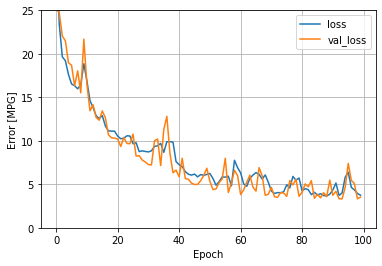

In [77]:
plot_loss(history)

In [78]:
test_results['linear_model_MultipInputs'] = linear_model.evaluate(test_features, test_labels, verbose=0)

In [79]:
test_results

{'Single_feature_Regression': 3.6445250511169434,
 'linear_model_MultipInputs': 3.364621639251709}

## Regression with a deep neural network (DNN) with single feature

In [80]:
# DNN

dnn_model = keras.Sequential([
    horsepower_normalizer, 
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation= 'relu'),
    layers.Dense(1)
])

In [81]:
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [82]:
dnn_model.compile(loss='mean_absolute_error', optimizer= tf.keras.optimizers.Adam(learning_rate=0.001))

In [83]:
feature

'Horsepower'

In [84]:
history_2 = dnn_model.fit(train_features[feature], train_labels, validation_split=0.2, verbose=1, epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 30ms/step - loss: 23.0331 - val_loss: 23.3806
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 22.7541 - val_loss: 23.0644
Epoch 3/100
8/8 [==============================] - 0s 13ms/step - loss: 22.4284 - val_loss: 22.6927
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 22.0401 - val_loss: 22.2168
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 21.5325 - val_loss: 21.5922
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 20.8631 - val_loss: 20.7898
Epoch 7/100
8/8 [==============================] - 0s 10ms/step - loss: 20.0087 - val_loss: 19.7729
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 18.9531 - val_loss: 18.6078
Epoch 9/100
8/8 [==============================] - 0s 10ms/step - loss: 17.8408 - val_loss: 17.3563
Epoch 10/100
8/8 [==============================] - 0s 10ms/step - loss: 16.5211 - val_loss: 16.0630
Epo

Epoch 84/100
8/8 [==============================] - 0s 15ms/step - loss: 3.2527 - val_loss: 3.7721
Epoch 85/100
8/8 [==============================] - 0s 18ms/step - loss: 3.2585 - val_loss: 3.7897
Epoch 86/100
8/8 [==============================] - 0s 28ms/step - loss: 3.2561 - val_loss: 3.7788
Epoch 87/100
8/8 [==============================] - 0s 14ms/step - loss: 3.2686 - val_loss: 3.7617
Epoch 88/100
8/8 [==============================] - 0s 19ms/step - loss: 3.2486 - val_loss: 3.7739
Epoch 89/100
8/8 [==============================] - 0s 19ms/step - loss: 3.2969 - val_loss: 3.7980
Epoch 90/100
8/8 [==============================] - 0s 18ms/step - loss: 3.2532 - val_loss: 3.7669
Epoch 91/100
8/8 [==============================] - 0s 18ms/step - loss: 3.2617 - val_loss: 3.7606
Epoch 92/100
8/8 [==============================] - 0s 24ms/step - loss: 3.2537 - val_loss: 3.7883
Epoch 93/100
8/8 [==============================] - 0s 14ms/step - loss: 3.2522 - val_loss: 3.7663
Epoch 94/1

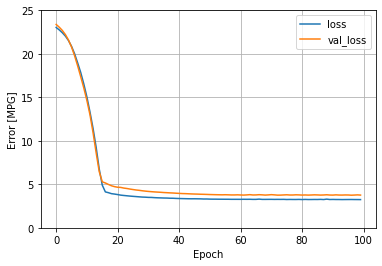

In [85]:
plot_loss(history_2)

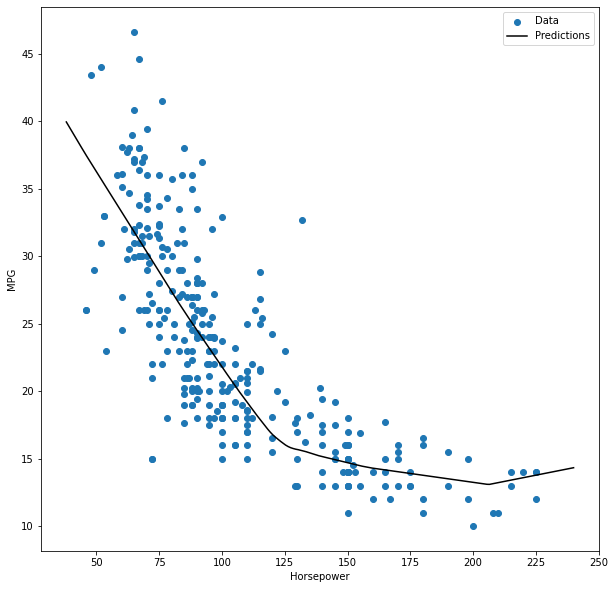

In [86]:
# If you plot the predictions as a function of 'Horsepower', you should notice how this model takes advantage of the nonlinearity provided by the hidden layers:

x = tf.linspace(range_min,range_max,200)
y = dnn_model.predict(x)

plot_feature(feature,x,y)

In [87]:
# Collect the results on the test set for later:

test_results['dnn_model_single_input'] = dnn_model.evaluate(test_features[feature], test_labels, verbose=1)

3/3 [==============================] - 0s 6ms/step - loss: 2.9101


In [88]:
# Ahaa, we should have 3 values now
test_results

{'Single_feature_Regression': 3.6445250511169434,
 'linear_model_MultipInputs': 3.364621639251709,
 'dnn_model_single_input': 2.910134792327881}

## Regression using a DNN and multiple inputs

In [89]:
horsepower_normalizer_1 = layers.Normalization(input_shape=[9,], axis=None)

In [90]:
# multiple input 

dnn_mi = tf.keras.Sequential([
    horsepower_normalizer_1,
    layers.Dense(units=1)
])


In [91]:
dnn_mi.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 9)                3         
 ion)                                                            
                                                                 
 dense_5 (Dense)             (None, 1)                 10        
                                                                 
Total params: 13
Trainable params: 10
Non-trainable params: 3
_________________________________________________________________


In [101]:
dnn_mi.compile(optimizer= tf.optimizers.Adam(learning_rate=0.001),loss='mean_absolute_error')

In [102]:
history_dnn_mi = dnn_mi.fit(
    train_features, train_labels, 
    epochs=100,
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 0s 24ms/step - loss: 3.5389 - val_loss: 3.5956
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 3.2430 - val_loss: 3.2509
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 3.5043 - val_loss: 3.2903
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 3.2875 - val_loss: 3.5830
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 3.2537 - val_loss: 3.1338
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 3.2624 - val_loss: 3.1147
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 3.1430 - val_loss: 3.0723
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 3.1250 - val_loss: 3.2570
Epoch 9/100
8/8 [==============================] - 0s 9ms/step - loss: 3.1365 - val_loss: 3.0653
Epoch 10/100
8/8 [==============================] - 0s 10ms/step - loss: 3.1051 - val_loss: 3.1739
Epoch 11/100
8/8 [=========

8/8 [==============================] - 0s 6ms/step - loss: 3.0598 - val_loss: 3.1114
Epoch 85/100
8/8 [==============================] - 0s 9ms/step - loss: 3.0752 - val_loss: 3.1157
Epoch 86/100
8/8 [==============================] - 0s 8ms/step - loss: 3.1051 - val_loss: 3.2982
Epoch 87/100
8/8 [==============================] - 0s 10ms/step - loss: 3.0840 - val_loss: 3.0490
Epoch 88/100
8/8 [==============================] - 0s 11ms/step - loss: 3.1446 - val_loss: 2.9681
Epoch 89/100
8/8 [==============================] - 0s 7ms/step - loss: 3.1278 - val_loss: 3.0419
Epoch 90/100
8/8 [==============================] - 0s 6ms/step - loss: 3.0584 - val_loss: 3.1257
Epoch 91/100
8/8 [==============================] - 0s 7ms/step - loss: 3.0464 - val_loss: 3.0684
Epoch 92/100
8/8 [==============================] - 0s 9ms/step - loss: 3.1495 - val_loss: 2.9701
Epoch 93/100
8/8 [==============================] - 0s 10ms/step - loss: 3.2857 - val_loss: 3.5249
Epoch 94/100
8/8 [============

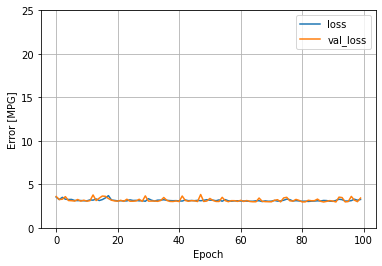

In [103]:
plot_loss(history_dnn_mi)

In [104]:
test_results['dnn_mi'] = dnn_mi.evaluate(test_features, test_labels, verbose=2)

3/3 - 0s - loss: 2.7347 - 38ms/epoch - 13ms/step


# Performance

In [105]:
pd.DataFrame(test_results, index=["Mean Absolute Error [MPG]"]).T

,Mean Absolute Error [MPG]
Single_feature_Regression,3.644525
linear_model_MultipInputs,3.364622
dnn_model_single_input,2.910135
dnn_mi,2.734736


# Make predictions

In [106]:
plt.axes

<function matplotlib.pyplot.axes(arg=None, **kwargs)>

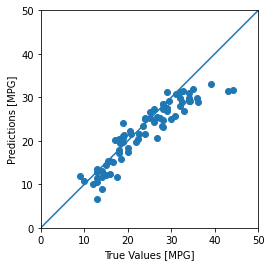

In [107]:
test_predictions = dnn_mi.predict(test_features).flatten()

# Equal: set the aspect of the axis scaling, i.e. the ratio of y-unit to x-unit.

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)

# Plot a line to split the square
_ = plt.plot(lims, lims)

In [108]:
# It appears that the model predicts reasonably well.

Text(0, 0.5, 'Count')

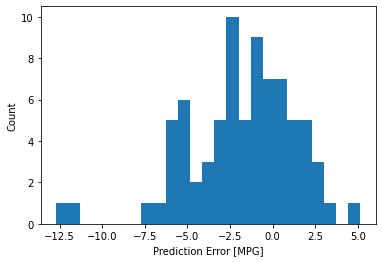

In [109]:
## Check the distribution

error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
plt.ylabel('Count')

## Model saving

In [110]:
# Save the model
dnn_mi.save('dnn_mi')

INFO:tensorflow:Assets written to: dnn_mi/assets


In [111]:
# Relade the model

reloaded = tf.keras.models.load_model('dnn_mi')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [112]:
test_results['reloaded']

2.734736204147339

In [113]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T


,Mean absolute error [MPG]
Single_feature_Regression,3.644525
linear_model_MultipInputs,3.364622
dnn_model_single_input,2.910135
dnn_mi,2.734736
reloaded,2.734736
